<a href="https://colab.research.google.com/github/sumitkshaw/ML-Projects/blob/main/ANN_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix, cohen_kappa_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [2]:
file_path = r'C:\Users\shaws\Downloads\heart.csv'
data = pd.read_csv(file_path)
print(data.columns)
data.head()


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_minority = data[data['target'] == 1]
df_majority = data[data['target'] == 0]
df_minor_upsampled = resample(df_minority, replace=True, n_samples=138, random_state=123)
df_upsampled = pd.concat([df_majority, df_minor_upsampled])

labels = df_upsampled['target']
features = df_upsampled.iloc[:, :13]


In [9]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


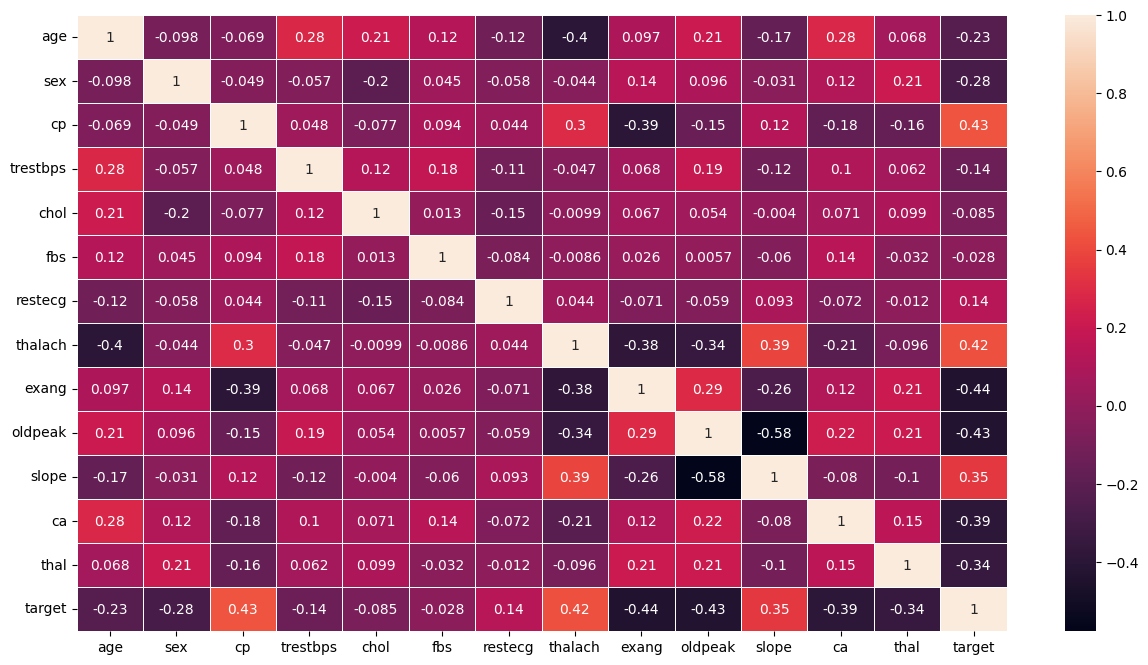

In [10]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
corrMatrix = data[columns].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show()


In [11]:
X = features
y = np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
H = model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=1, validation_data=(X_test, y_test))


C:\Users\shaws\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4414 - loss: 0.6938 - val_accuracy: 0.7065 - val_loss: 0.6803
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6168 - loss: 0.6793 - val_accuracy: 0.7609 - val_loss: 0.6702
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7203 - loss: 0.6672 - val_accuracy: 0.7500 - val_loss: 0.6393
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.6343 - val_accuracy: 0.8043 - val_loss: 0.5949
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.6023 - val_accuracy: 0.8261 - val_loss: 0.5352
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.5568 - val_accuracy: 0.8152 - val_loss: 0.4959
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7825 - loss: 0.5076 - val_accuracy: 0.8478 - val_loss: 0.4466
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8225 - loss: 0.4827 - val_accuracy: 0.8478 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


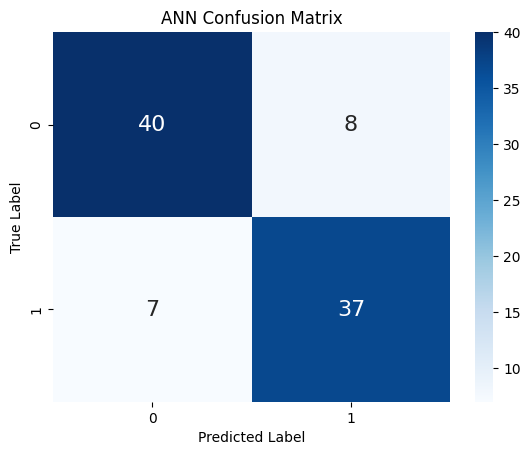

[[40  8]
 [ 7 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.82      0.84      0.83        44

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Accuracy : 100.00%
Testing Accuracy : 83.70%
Sensitivity: 0.84
Specificity: 0.83
Precision: 0.82
F1 Score: 0.83
Recall: 0.84


In [13]:
y_pred = model.predict(X_test).round()

conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ANN Confusion Matrix')
plt.show()

print(conf_matrix)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Training Accuracy : {:.2f}%'.format(accuracy_score(model.predict(X_train).round(), y_train) * 100))
print('Testing Accuracy : {:.2f}%'.format(accuracy_score(y_pred, y_test) * 100))
print('Sensitivity: {:.2f}'.format(conf_matrix[1][1]/(conf_matrix[1][0]+conf_matrix[1][1])))
print('Specificity: {:.2f}'.format(conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))



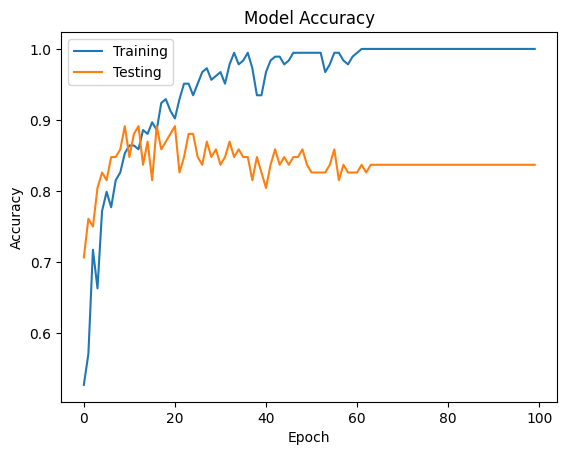

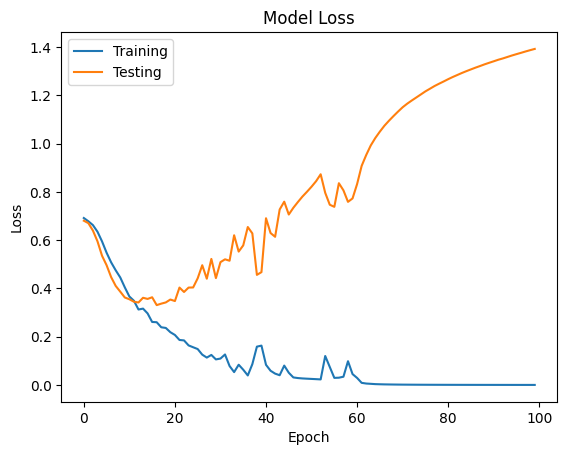

In [14]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


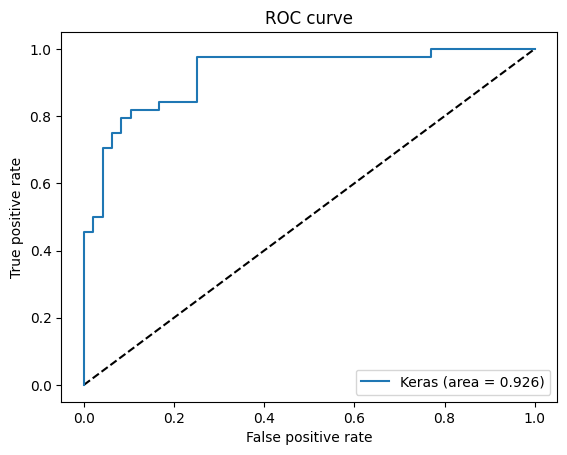

In [15]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [16]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

print(f"Training labels distribution:\n{np.bincount(y_train.astype(int))}")
print(f"Testing labels distribution:\n{np.bincount(y_test.astype(int))}")


Training data shape: (184, 13)
Testing data shape: (92, 13)
Training labels distribution:
[90 94]
Testing labels distribution:
[48 44]


In [18]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test).round().astype(int)
train_accuracy = accuracy_score(model.predict(X_train).round().astype(int), y_train)
test_accuracy = accuracy_score(y_pred, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Accuracy: 100.00%
Testing Accuracy: 83.70%
Confusion Matrix:
[[40  8]
 [ 7 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.82      0.84      0.83        44

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92

